## **Establish the Alert Status Gauge**

## **Python Libraries**

In [20]:
import pandas as pd
import json

import matplotlib.pyplot as plt
import plotly.graph_objects as go


In [21]:
#return filepath information
root = './data/'
file_proton = 'proton.json'
file_xray = 'xrays-flares.json'

path_proton = root + file_proton
path_electron = root + file_xray

print(path_proton)
print(path_electron)


./data/proton.json
./data/xrays-flares.json


In [22]:
#return dataFrames of the source data
df_electron = pd.read_json(path_electron)
df_proton = pd.read_json(path_proton)



In [23]:
df_electron


,time_tag,begin_time,begin_class,max_time,max_class,max_xrlong,max_ratio,max_ratio_time,current_int_xrlong,end_time,end_class,satellite
0,2022-09-26T08:48:00Z,2022-09-26 08:48:00+00:00,C1.0,2022-09-26 09:11:00+00:00,C4.7,0.000005,5.888602,2022-09-26 09:04:58+00:00,0.009435,2022-09-26 09:36:00+00:00,C2.8,16
1,2022-09-26T12:39:00Z,2022-09-26 12:39:00+00:00,C1.3,2022-09-26 12:51:00+00:00,C2.1,0.000002,0.123774,2022-09-26 12:44:39+00:00,0.003460,2022-09-26 13:09:00+00:00,C1.6,16
2,2022-09-26T15:37:00Z,2022-09-26 15:37:00+00:00,B9.5,2022-09-26 15:45:00+00:00,C2.9,0.000003,0.131328,2022-09-26 15:44:10+00:00,0.001404,2022-09-26 15:50:00+00:00,C1.8,16
3,2022-09-26T17:57:00Z,2022-09-26 17:57:00+00:00,C1.0,2022-09-26 18:07:00+00:00,C1.8,0.000002,0.226748,2022-09-26 18:02:41+00:00,0.002635,2022-09-26 18:25:00+00:00,C1.3,16
4,2022-09-26T20:44:00Z,2022-09-26 20:44:00+00:00,B9.1,2022-09-26 21:14:00+00:00,C3.6,0.000004,0.295939,2022-09-26 20:47:26+00:00,0.007023,2022-09-26 21:32:00+00:00,C2.2,16
...,...,...,...,...,...,...,...,...,...,...,...,...
60,2022-10-02T17:23:00Z,2022-10-02 17:23:00+00:00,C1.7,2022-10-02 17:34:00+00:00,C3.6,0.000004,0.072031,2022-10-02 17:30:46+00:00,0.002468,2022-10-02 17:53:00+00:00,C2.8,16
61,2022-10-02T17:53:00Z,2022-10-02 17:53:00+00:00,C2.8,2022-10-02 18:07:00+00:00,C7.8,0.000008,0.133809,2022-10-02 18:05:04+00:00,0.011571,2022-10-02 18:26:00+00:00,C5.0,16
62,2022-10-02T18:49:00Z,2022-10-02 18:49:00+00:00,C3.1,2022-10-02 19:08:00+00:00,C8.1,0.000008,0.148386,2022-10-02 19:02:31+00:00,0.013977,2022-10-02 19:25:00+00:00,C5.3,16
63,2022-10-02T19:53:00Z,2022-10-02 19:53:00+00:00,C4.3,2022-10-02 20:25:00+00:00,X1.0,0.000106,0.297887,2022-10-02 20:23:12+00:00,0.086362,2022-10-02 20:34:00+00:00,M4.9,16


Text(0.5, 1.0, 'Max Ratio of Solar Flux')

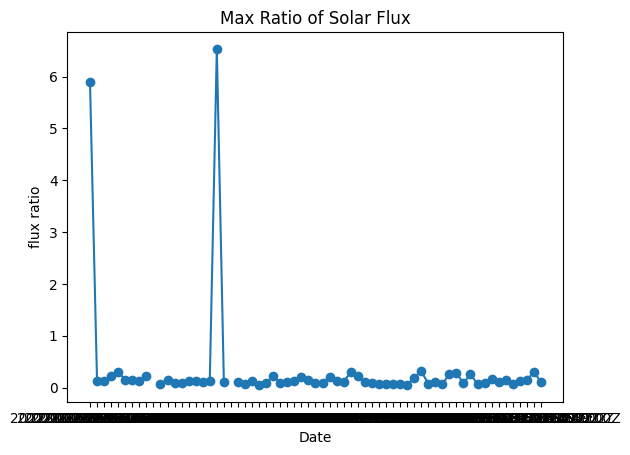

In [24]:
df_electron = df_electron.set_index('time_tag')
plt.plot(df_electron['max_ratio'], marker='o')
plt.xlabel("Date")
plt.ylabel("flux ratio")
plt.title("Max Ratio of Solar Flux")

In [25]:
alert_data = df_electron.at[59,'max_class']
alert_data


KeyError: 59

In [ ]:
#return a status gauge for solar flare activity
fig = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = 270,
    domain = {'x': [0, 1], 'y': [0, 1]},
    title = {'text': 'Solar Storm Status'}))

fig.show()



ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
df_maxvals

In [ ]:
#return the json into usable data
lst_files = [path_proton, path_electron]
df_maxvals = pd.DataFrame(columns=['max_date', 'max_class'])
for file in lst_files:
    if file==path_proton:   # alert status data for aurora borialis 
        pass
    elif file==path_electron:   # alert status data for solar flares
        with open(file, 'r') as f:
            data = json.load(f)
            
            print('Pre-selected M-class Solar Flare')
            print('================================')
            print(data[59])
            for i in data:
                idx = len(df_maxvals.index)
                # if idx==0:
                    
                # df_maxvals.at(len(df_maxvals.index),:) = [i][0]['max_class']
                # df_maxvals.at() = [i][0]['max_time']
                # print(i)
                # print('---')
                



Pre-selected M-class Solar Flare
{'time_tag': '2022-10-02T15:34:00Z', 'begin_time': '2022-10-02T15:34:00Z', 'begin_class': 'C2.6', 'max_time': '2022-10-02T15:45:00Z', 'max_class': 'M1.0', 'max_xrlong': 1.0746646694315132e-05, 'max_ratio': 0.15490299093216198, 'max_ratio_time': '2022-10-02T15:43:27Z', 'current_int_xrlong': 0.008081440813839436, 'end_time': '2022-10-02T15:53:00Z', 'end_class': 'C5.8', 'satellite': 16}


In [ ]:
data